In [5]:
import pandas as pd

read_cities_info = pd.read_csv('cities_info.csv')

read_cities_info = read_cities_info.iloc[ 1:,[2,3,19,20]]


In [27]:

#데이터 표준화
def z_score_normalize(list) :
    normalized = []
    
    for value in list :
        normalized_num = (value - np.mean(list)) / np.std(list)
        normalized.append(normalized_num)
    return normalized

def min_max_normalize(list) :
    normalized = []
    
    for value in list :
        normalized_num = (value - min(list)) / (max(list) - min(list))
        normalized.append(normalized_num)
    
    return normalized

#데이터 표준화를 위한 정의
all_size, all_population = [], []
for index in range(1, (len(read_cities_info['total(m^2)']))+1) :
    all_size.append(read_cities_info['total(m^2)'][index])
    all_population.append(read_cities_info['population'][index])

    
"""
for i in range(1, (len(read_cities_info['total(m^2)']))+1) :
    
    if read_cities_info['total(m^2)'][i] == all_size[i-1] :
        print(read_cities_info['total(m^2)'][i],'  ',all_size[i-1])
        print('size same ',i,'\n')

    if read_cities_info['population'][i] == all_population[i-1] :
        print(read_cities_info['population'][i],'  ',all_population[i-1])
        print('population same ',i,'\n')
"""
    

all_size = min_max_normalize(all_size)
all_population = min_max_normalize(all_population)
read_cities_info['total(m^2)'] = min_max_normalize(read_cities_info['total(m^2)'])
read_cities_info['population'] = min_max_normalize(read_cities_info['population'] )
print(all_size)
print('\n')
print(read_cities_info['total(m^2)'] )
print('\n')
print(read_cities_info['population'])
print('\n')
print(all_population)

[0.32005697564822827, 0.4122763277136379, 0.4758295366835475, 0.5762859520207992, 0.2618233002971301, 0.28324675592836407, 0.57520127344409, 0.24151618976135084, 0.04910142337204823, 0.0606320206019874, 0.13136645980355346, 0.31228298491830153, 0.011265269889748707, 0.06820851067873726, 0.014094134745271814, 0.23769844780313426, 0.36969946240316276, 0.23770137399159666, 0.026988550688021334, 0.05836492461282881, 0.35803879724326654, 0.002914684607679343, 0.13614622161396153, 0.0017370759038658997, 0.22255883555745426, 0.23957611617824842, 0.1550132640950024, 0.005268551122411187, 0.0, 0.29104412091070714, 0.44395758092894066, 0.011569880568566443, 0.03340582076871713, 0.32178823499005976, 0.47252224924795194, 0.034889869508794, 0.0014305161115628954, 0.45351337420508475, 0.3598278523047779, 0.6061063648229791, 0.46724878700870276, 0.5637474415143429, 0.08220320314254712, 0.1511967723003018, 0.040528873628268576, 0.6455880194517967, 1.0, 0.5399019569167665, 0.6123919228464082, 0.8005651

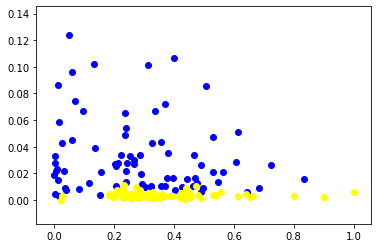

In [28]:
import matplotlib.pyplot as plt
import numpy as np


MC_size, C_size, T_size = [], [], []
MC_population, C_population, T_population = [], [], []

for index in range(1, (len(read_cities_info['classification']))+1) :
    if read_cities_info['classification'][index] == 'Metropolitan City' :
        MC_size.append(all_size[index - 1])
        MC_population.append(all_population[index-1])
   
    elif read_cities_info['classification'][index] == 'City' :
        C_size.append(all_size[index - 1])
        C_population.append(all_population[index-1])
        
    else:
        T_size.append(all_size[index - 1])
        T_population.append(all_population[index-1])
        

        

#plt.scatter(MC_size, MC_population, c='red') -- 일단 2가지만 해보기
plt.scatter(C_size, C_population, c= 'blue')
#plt.show()
plt.scatter(T_size, T_population, c= 'yellow')
#plt.ylim(-0.005, 0.015)
#plt.show()


In [30]:
from sklearn.model_selection import train_test_split

city_data = read_cities_info.iloc[ 0:,[1,2]]
city_target = read_cities_info.iloc[ 0:,[3]]

#print(read_cities_info_df)
print(city_data)
print(city_target)

training_data, validation_data ,training_labels, validation_labels = train_test_split(city_data, city_target, test_size = 0.2, random_state = 100)

print(len(training_data))
print(len(validation_data))
print(len(training_labels))
print(len(validation_labels))


     total(m^2)  population
1      0.320057    1.000000
2      0.412276    0.350183
3      0.475830    0.251148
4      0.576286    0.299739
5      0.261823    0.152833
..          ...         ...
157    0.430836    0.005279
158    0.531714    0.003570
159    0.529039    0.047643
160    0.469042    0.016507
161    0.359442    0.003569

[161 rows x 2 columns]
        classification
1    Metropolitan City
2    Metropolitan City
3    Metropolitan City
4    Metropolitan City
5    Metropolitan City
..                 ...
157               Town
158               Town
159               City
160               City
161               Town

[161 rows x 1 columns]
128
33
128
33


In [31]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)

classifier.fit(training_data, training_labels)

C:\Users\Sub\Anaconda3\envs\sub\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
print(classifier.score(validation_data, validation_labels))

0.7575757575757576


In [33]:
n_list = range(1,101)
accuracies = []
highest = [[0,0]]

for n in n_list :
    classifier = KNeighborsClassifier(n_neighbors = n)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))
    
    if highest[0][1] < max(accuracies) : 
        highest[0][0] = n
        highest[0][1] = max(accuracies)

C:\Users\Sub\Anaconda3\envs\sub\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Sub\Anaconda3\envs\sub\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Sub\Anaconda3\envs\sub\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Sub\Anaconda3\envs\sub\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Sub\Anaconda3\e

C:\Users\Sub\Anaconda3\envs\sub\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Sub\Anaconda3\envs\sub\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Sub\Anaconda3\envs\sub\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Sub\Anaconda3\envs\sub\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Sub\Anaconda3\e

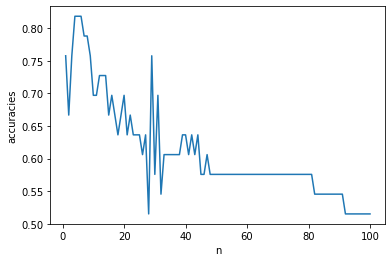

The highest accuracy n-Neighbors :  4
The highest accuracy :  0.8181818181818182


In [34]:

plt.plot(n_list, accuracies)
plt.xlabel('n')
plt.ylabel('accuracies')
plt.show()

print('The highest accuracy n-Neighbors : ',highest[0][0])
print('The highest accuracy : ',highest[0][1])


     total(m^2)  population
32     0.011570    0.014708
29     0.000000    0.018601
83     0.096349    0.066606
155    0.426141    0.002603
143    0.380327    0.035397
..          ...         ...
88     0.286821    0.007568
104    0.229410    0.001615
68     0.337313    0.066538
25     0.222559    0.034147
9      0.049101    0.124148

[128 rows x 2 columns] 
     classification
32            City
29            City
83            City
155           Town
143           City
..             ...
88            City
104           Town
68            City
25            City
9             City

[128 rows x 1 columns]
['City']


C:\Users\Sub\Anaconda3\envs\sub\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


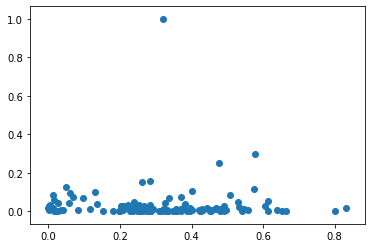

In [38]:
import matplotlib.pyplot as plt
import numpy as np
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(training_data, training_labels)

print(training_data,'\n',training_labels)
plt.scatter(training_data['total(m^2)'], training_data['population'])
print(classifier.predict([[ 0.0429410 ,0.021615]]))